<a href="https://colab.research.google.com/github/ankesh86/DiffusionModels/blob/main/GANS/GenerativeAdversialNetwork_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from tensorflow.keras import layers

In [2]:
(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

train_images.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [3]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')

train_images.shape

(60000, 28, 28, 1)

In [4]:
train_images[36782, :10, :10]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  2.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  2.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  4.],
        [  0.],
        [ 80.],
        [249.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  2.],
        [  0.],
        [  1.],
        [201.],
        [192.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [134.],
        [208.],
        [172.]],

       [[  0.],
        [  0

In [5]:
train_images = (train_images - 127.5)/ 127.5

train_images[56782, :10, :10]

array([[[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-0.99215686],
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.41960785]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.39607844],
        [ 0.62352943]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
   

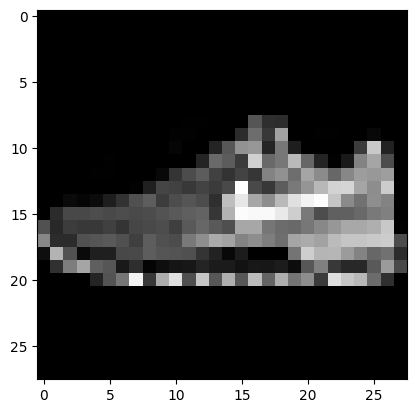

In [6]:
plt.imshow(train_images[2567].squeeze(), cmap='gray')

In [7]:
buffer_size = 60000
batch_size = 128

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)

In [9]:
def generator_model():

  model = tf.keras.Sequential()
  model.add(layers.Dense(64, input_dim=100))
  model.add(layers.ReLU())

  model.add(layers.Dense(128))
  model.add(layers.ReLU())

  model.add(layers.Dense(256))
  model.add(layers.ReLU())

  model.add(layers.Dense(784, activation='tanh'))
  model.add(layers.Reshape((28, 28, 1)))

  return model

In [10]:
generator = generator_model()

generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │         201,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,296 (973.81 KB)

 Trainable params: 249,296 (973.81 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training = False)

generated_image.shape

TensorShape([1, 28, 28, 1])

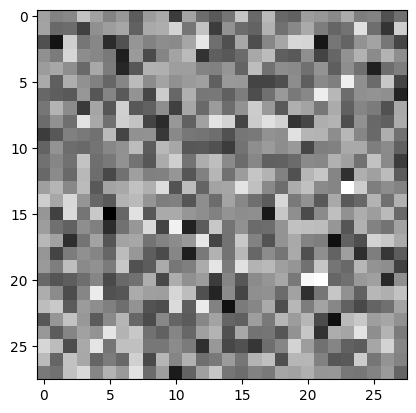

In [13]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [14]:
def discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Input(shape = (28, 28, 1)))
  model.add(layers.Flatten())

  model.add(layers.Dense(256))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(128))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(64))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(1, activation='sigmoid'))

  return model

In [15]:
discriminator = discriminator_model()

discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,177 (946.00 KB)

 Trainable params: 242,177 (946.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
discriminator = discriminator_model()
output = discriminator(generated_image)

print(output)

tf.Tensor([[0.5425331]], shape=(1, 1), dtype=float32)


## Defining loss-func

In [17]:
bce = tf.keras.losses.BinaryCrossentropy()

In [18]:
def discriminator_loss(real_output, fake_output):

  real_loss = bce(tf.ones_like(real_output), real_output)

  fake_loss = bce(tf.zeros_like(fake_output), fake_output)

  total_loss = real_loss + fake_loss

  return total_loss

In [19]:
def generator_loss(fake_output):

  gen_loss = bce(tf.ones_like(fake_output), fake_output)

  return gen_loss

In [20]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [21]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                                 discriminator_optimizer = discriminator_optimizer,
                                 generator = generator,
                                 discriminator = discriminator)


## Starting training process

In [26]:
epochs = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [22]:
@tf.function
def train_step(images):
  noise = tf.random.normal([batch_size, noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training = True)

    real_output = discriminator(images, training = True)
    fake_output = discriminator(generated_images, training=True)

    disc_loss = discriminator_loss(real_output, fake_output)
    gen_loss = generator_loss(fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return (gen_loss, disc_loss, tf.reduce_mean(real_output), tf.reduce_mean(fake_output))

In [28]:
def generate_and_plot_images(model, epoch, test_input):

  predictions = model(test_input, training=False)

  fig = plt.figure(figsize = (8,4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    pred = (predictions[i, :, :, 0] + 1)* 127.5
    pred = np.array(pred)
    plt.imshow(pred.astype(np.uint), cmap = 'gray')
    plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [30]:
def train(dataset, epochs):

  gen_loss_list = []
  disc_loss_list = []

  real_score_list = []
  fake_score_list = []

  for epoch in tqdm(range(epochs)):
    start = time.time()
    num_batches = len(dataset)

    print(f'Training started with epoch {epoch + 1} with {num_batches} batches...')

    total_gen_loss = 0
    total_disc_loss = 0

    for batch in dataset:
      generator_loss, discriminator_loss, real_score, fake_score = train_step(batch)
      total_gen_loss += generator_loss
      total_disc_loss += discriminator_loss

    mean_gen_loss = total_disc_loss/num_batches
    mean_disc_loss = total_disc_loss/ num_batches

    print('Losses after epoch %5d: generator %.3f, discriminator %.3f, real_score %.2f%%, fake_score %.2f%%' %
     (epoch+1, generator_loss, discriminator_loss, real_score*100, fake_score*100))

    generate_and_plot_images(generator, epoch+1, seed)

    gen_loss_list.append(mean_gen_loss)
    disc_loss_list.append(mean_disc_loss)
    real_score_list.append(real_score)
    fake_score_list.append(fake_score)

    if (epoch+1)%10 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

    print('Time for epoch {} is {} sec'.format(epoch+1, time.time()-start))

  return gen_loss_list, disc_loss_list, real_score_list, fake_score_list



  0%|          | 0/50 [00:00<?, ?it/s]

Training started with epoch 1 with 469 batches...
Losses after epoch     1: generator 3.533, discriminator 0.209, real_score 97.23%, fake_score 6.57%


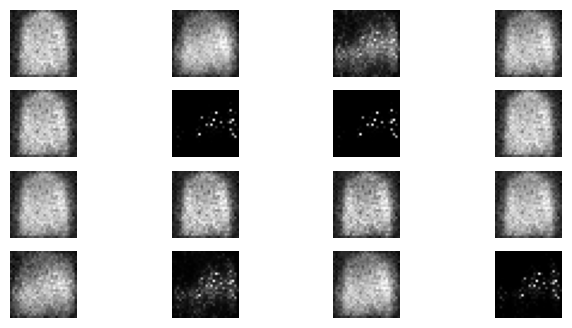

  2%|▏         | 1/50 [00:03<02:47,  3.43s/it]

Time for epoch 1 is 3.4275147914886475 sec
Training started with epoch 2 with 469 batches...
Losses after epoch     2: generator 2.903, discriminator 0.365, real_score 84.64%, fake_score 10.77%


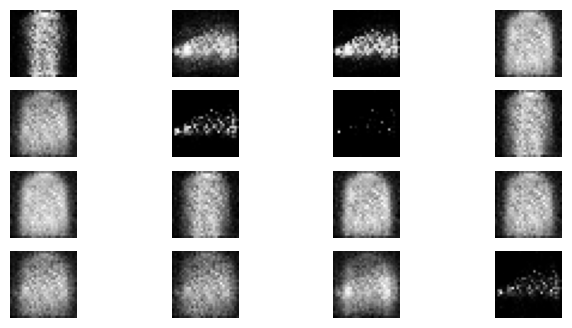

  4%|▍         | 2/50 [00:07<03:08,  3.93s/it]

Time for epoch 2 is 4.282222270965576 sec
Training started with epoch 3 with 469 batches...
Losses after epoch     3: generator 2.891, discriminator 0.378, real_score 89.30%, fake_score 13.32%


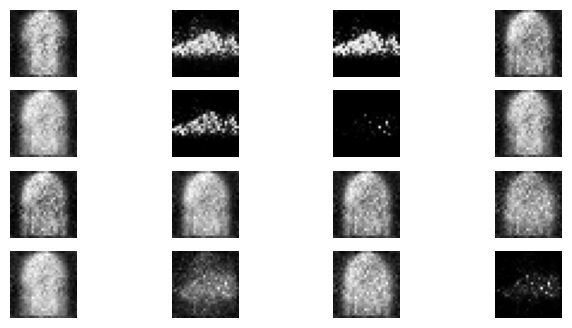

  6%|▌         | 3/50 [00:11<02:54,  3.72s/it]

Time for epoch 3 is 3.4561705589294434 sec
Training started with epoch 4 with 469 batches...
Losses after epoch     4: generator 2.239, discriminator 0.456, real_score 88.50%, fake_score 18.36%


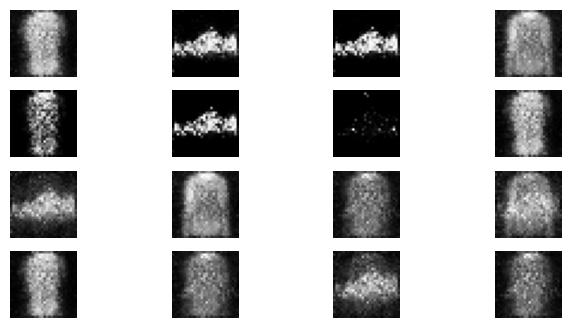

  8%|▊         | 4/50 [00:14<02:50,  3.70s/it]

Time for epoch 4 is 3.676321268081665 sec
Training started with epoch 5 with 469 batches...
Losses after epoch     5: generator 2.951, discriminator 0.526, real_score 84.54%, fake_score 14.34%


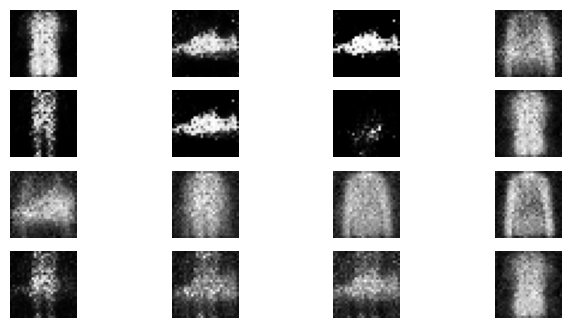

 10%|█         | 5/50 [00:18<02:53,  3.86s/it]

Time for epoch 5 is 4.129155874252319 sec
Training started with epoch 6 with 469 batches...
Losses after epoch     6: generator 2.160, discriminator 0.765, real_score 75.96%, fake_score 20.67%


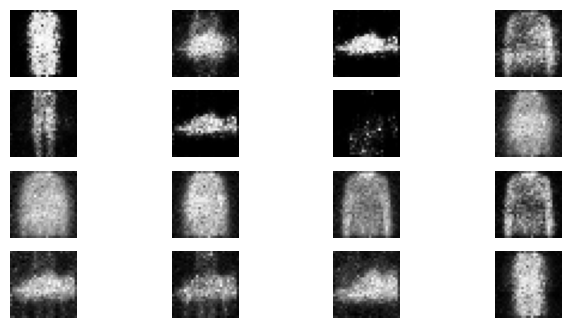

 12%|█▏        | 6/50 [00:22<02:45,  3.75s/it]

Time for epoch 6 is 3.5491013526916504 sec
Training started with epoch 7 with 469 batches...
Losses after epoch     7: generator 2.112, discriminator 0.444, real_score 85.91%, fake_score 17.58%


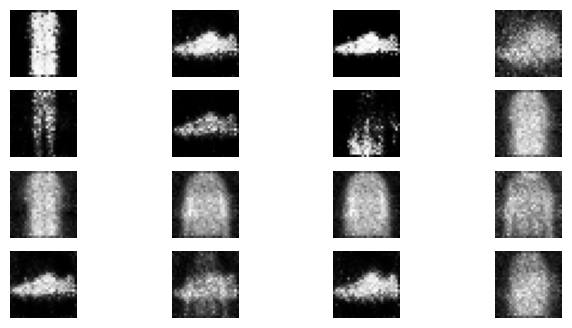

 14%|█▍        | 7/50 [00:25<02:37,  3.66s/it]

Time for epoch 7 is 3.428480625152588 sec
Training started with epoch 8 with 469 batches...
Losses after epoch     8: generator 1.372, discriminator 0.814, real_score 84.78%, fake_score 32.46%


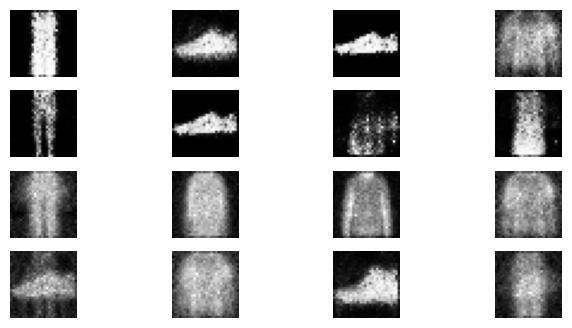

 16%|█▌        | 8/50 [00:29<02:36,  3.72s/it]

Time for epoch 8 is 3.848980665206909 sec
Training started with epoch 9 with 469 batches...
Losses after epoch     9: generator 2.534, discriminator 0.509, real_score 82.44%, fake_score 15.04%


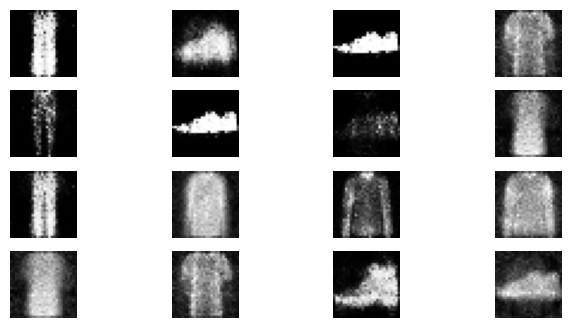

 18%|█▊        | 9/50 [00:34<02:38,  3.88s/it]

Time for epoch 9 is 4.2190587520599365 sec
Training started with epoch 10 with 469 batches...
Losses after epoch    10: generator 1.225, discriminator 1.040, real_score 71.63%, fake_score 35.73%


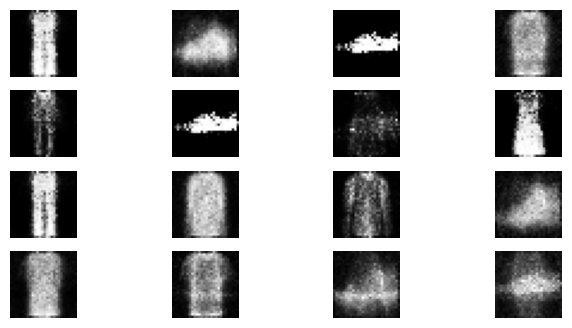

 20%|██        | 10/50 [00:37<02:32,  3.81s/it]

Time for epoch 10 is 3.650169610977173 sec
Training started with epoch 11 with 469 batches...
Losses after epoch    11: generator 2.160, discriminator 0.664, real_score 80.62%, fake_score 22.85%


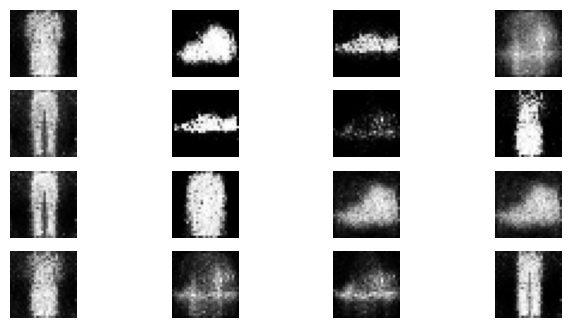

 22%|██▏       | 11/50 [00:41<02:25,  3.73s/it]

Time for epoch 11 is 3.5396900177001953 sec
Training started with epoch 12 with 469 batches...
Losses after epoch    12: generator 2.416, discriminator 0.584, real_score 84.02%, fake_score 18.58%


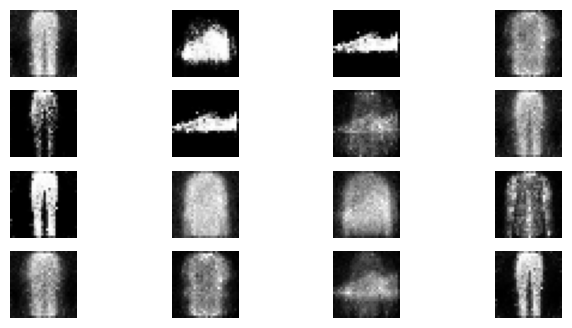

 24%|██▍       | 12/50 [00:45<02:32,  4.03s/it]

Time for epoch 12 is 4.7087836265563965 sec
Training started with epoch 13 with 469 batches...
Losses after epoch    13: generator 3.214, discriminator 0.409, real_score 85.95%, fake_score 11.82%


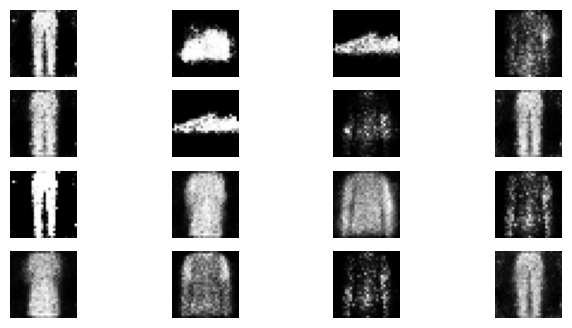

 26%|██▌       | 13/50 [00:50<02:30,  4.06s/it]

Time for epoch 13 is 4.142127752304077 sec
Training started with epoch 14 with 469 batches...
Losses after epoch    14: generator 2.867, discriminator 0.510, real_score 85.47%, fake_score 14.43%


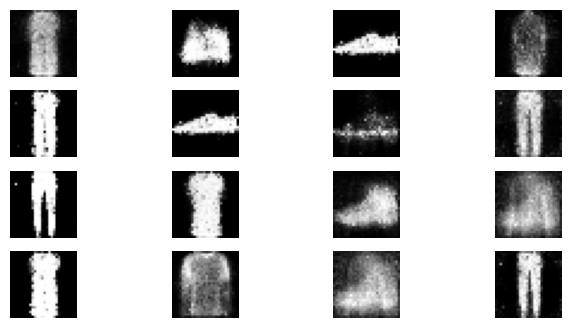

 28%|██▊       | 14/50 [00:53<02:23,  3.98s/it]

Time for epoch 14 is 3.7872419357299805 sec
Training started with epoch 15 with 469 batches...
Losses after epoch    15: generator 2.417, discriminator 0.735, real_score 76.22%, fake_score 15.47%


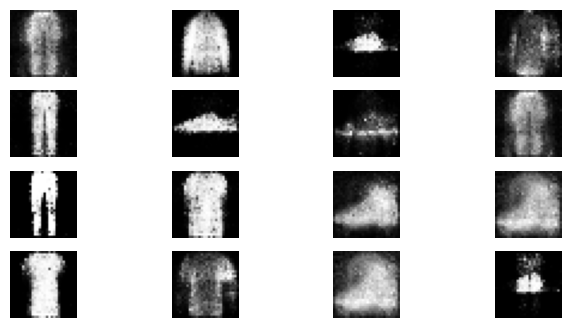

 30%|███       | 15/50 [00:58<02:26,  4.18s/it]

Time for epoch 15 is 4.646144390106201 sec
Training started with epoch 16 with 469 batches...
Losses after epoch    16: generator 2.209, discriminator 0.565, real_score 82.08%, fake_score 16.90%


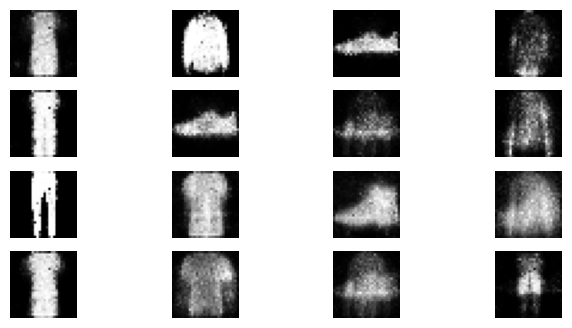

 32%|███▏      | 16/50 [01:02<02:17,  4.04s/it]

Time for epoch 16 is 3.7210216522216797 sec
Training started with epoch 17 with 469 batches...
Losses after epoch    17: generator 2.613, discriminator 0.601, real_score 82.06%, fake_score 15.65%


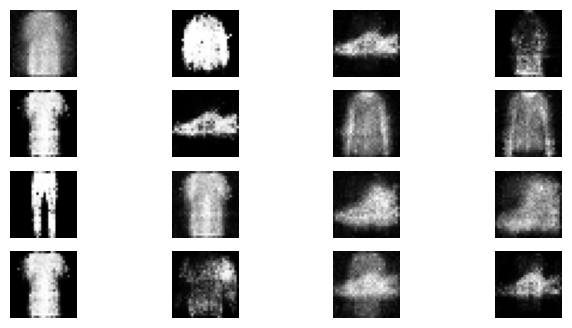

 34%|███▍      | 17/50 [01:06<02:10,  3.95s/it]

Time for epoch 17 is 3.732524871826172 sec
Training started with epoch 18 with 469 batches...
Losses after epoch    18: generator 2.005, discriminator 0.606, real_score 89.43%, fake_score 25.18%


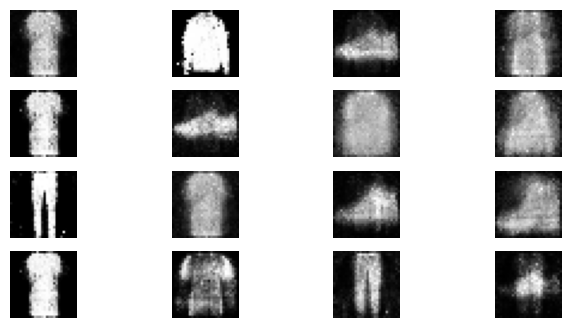

 36%|███▌      | 18/50 [01:10<02:13,  4.19s/it]

Time for epoch 18 is 4.721580982208252 sec
Training started with epoch 19 with 469 batches...
Losses after epoch    19: generator 2.624, discriminator 0.724, real_score 79.21%, fake_score 19.32%


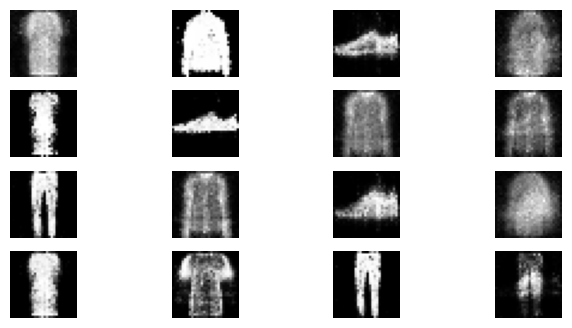

 38%|███▊      | 19/50 [01:14<02:04,  4.03s/it]

Time for epoch 19 is 3.664912700653076 sec
Training started with epoch 20 with 469 batches...
Losses after epoch    20: generator 2.161, discriminator 0.783, real_score 75.35%, fake_score 21.95%


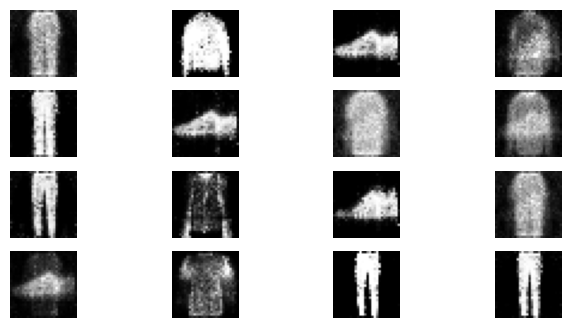

 40%|████      | 20/50 [01:18<01:56,  3.90s/it]

Time for epoch 20 is 3.585365056991577 sec
Training started with epoch 21 with 469 batches...
Losses after epoch    21: generator 2.466, discriminator 0.626, real_score 84.98%, fake_score 19.59%


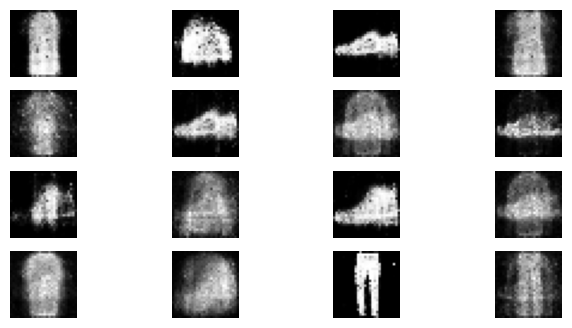

 42%|████▏     | 21/50 [01:21<01:49,  3.79s/it]

Time for epoch 21 is 3.51944637298584 sec
Training started with epoch 22 with 469 batches...
Losses after epoch    22: generator 3.089, discriminator 0.705, real_score 77.41%, fake_score 15.29%


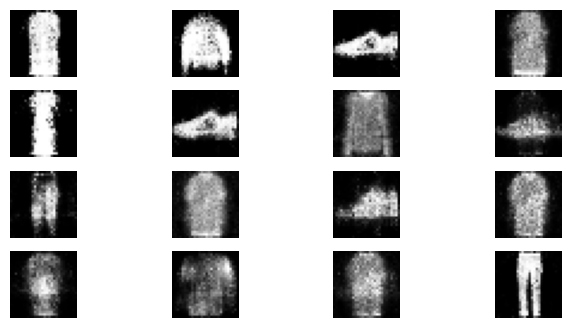

 44%|████▍     | 22/50 [01:26<01:52,  4.00s/it]

Time for epoch 22 is 4.4932122230529785 sec
Training started with epoch 23 with 469 batches...
Losses after epoch    23: generator 2.856, discriminator 0.565, real_score 84.66%, fake_score 14.95%


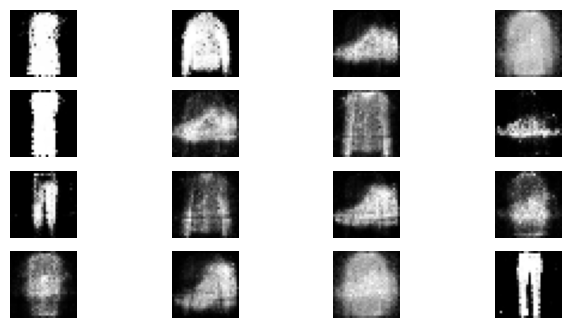

 46%|████▌     | 23/50 [01:29<01:43,  3.83s/it]

Time for epoch 23 is 3.432833194732666 sec
Training started with epoch 24 with 469 batches...
Losses after epoch    24: generator 2.177, discriminator 0.587, real_score 82.25%, fake_score 19.04%


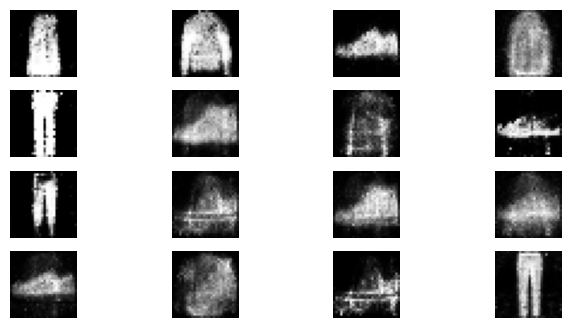

 48%|████▊     | 24/50 [01:32<01:36,  3.72s/it]

Time for epoch 24 is 3.472702741622925 sec
Training started with epoch 25 with 469 batches...
Losses after epoch    25: generator 2.235, discriminator 0.698, real_score 77.13%, fake_score 18.77%


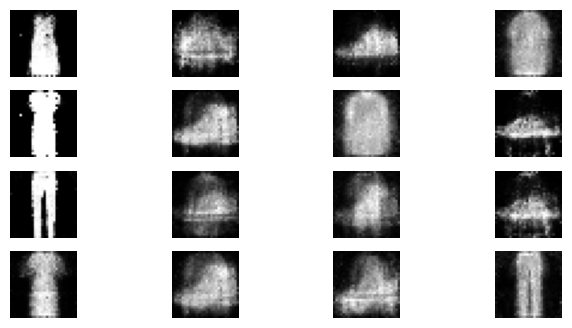

 50%|█████     | 25/50 [01:37<01:37,  3.91s/it]

Time for epoch 25 is 4.334563732147217 sec
Training started with epoch 26 with 469 batches...
Losses after epoch    26: generator 1.560, discriminator 0.894, real_score 73.37%, fake_score 28.34%


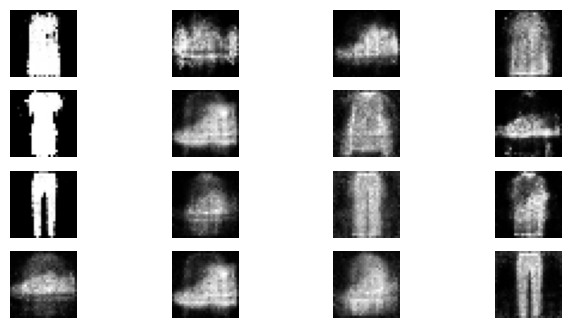

 52%|█████▏    | 26/50 [01:40<01:30,  3.77s/it]

Time for epoch 26 is 3.433816909790039 sec
Training started with epoch 27 with 469 batches...
Losses after epoch    27: generator 2.023, discriminator 1.055, real_score 68.51%, fake_score 22.80%


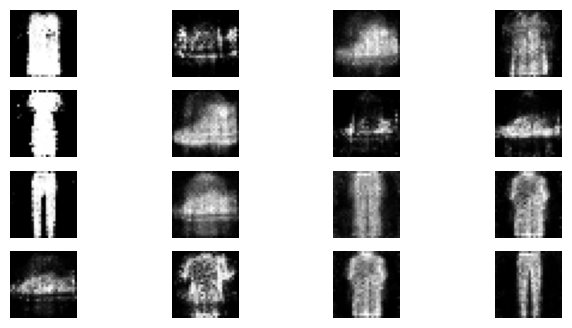

 54%|█████▍    | 27/50 [01:44<01:26,  3.78s/it]

Time for epoch 27 is 3.7916548252105713 sec
Training started with epoch 28 with 469 batches...
Losses after epoch    28: generator 2.311, discriminator 0.944, real_score 71.03%, fake_score 21.04%


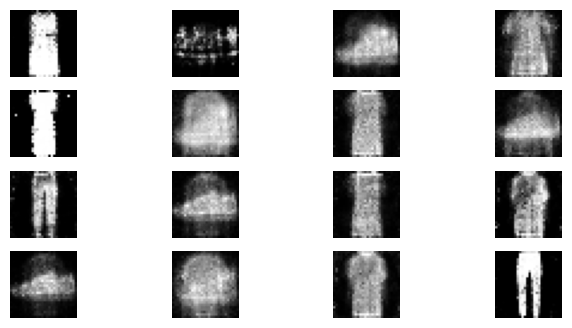

 56%|█████▌    | 28/50 [01:48<01:24,  3.86s/it]

Time for epoch 28 is 4.059357643127441 sec
Training started with epoch 29 with 469 batches...
Losses after epoch    29: generator 2.217, discriminator 0.817, real_score 80.05%, fake_score 26.61%


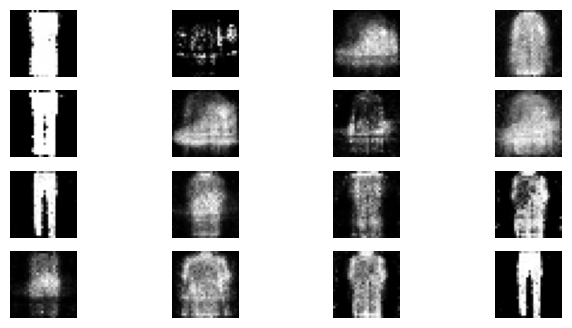

 58%|█████▊    | 29/50 [01:52<01:20,  3.84s/it]

Time for epoch 29 is 3.782248020172119 sec
Training started with epoch 30 with 469 batches...
Losses after epoch    30: generator 2.086, discriminator 0.648, real_score 80.76%, fake_score 21.75%


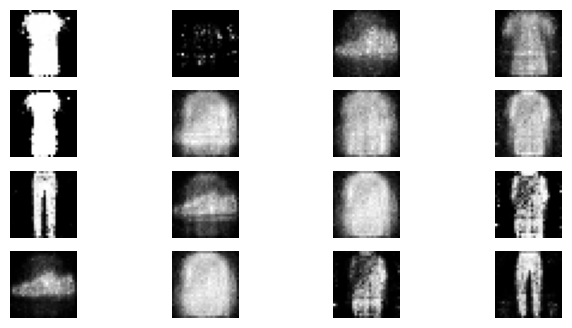

 60%|██████    | 30/50 [01:55<01:15,  3.77s/it]

Time for epoch 30 is 3.605985641479492 sec
Training started with epoch 31 with 469 batches...
Losses after epoch    31: generator 2.493, discriminator 0.637, real_score 80.65%, fake_score 18.80%


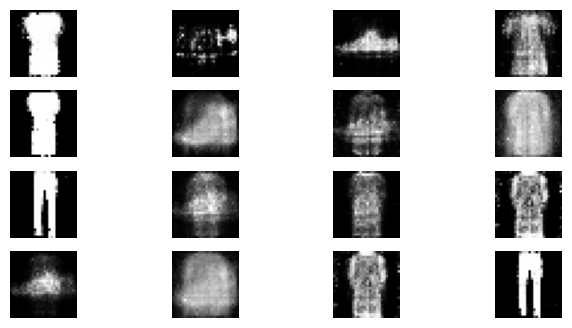

 62%|██████▏   | 31/50 [01:59<01:11,  3.76s/it]

Time for epoch 31 is 3.738853931427002 sec
Training started with epoch 32 with 469 batches...
Losses after epoch    32: generator 2.116, discriminator 0.764, real_score 81.93%, fake_score 23.78%


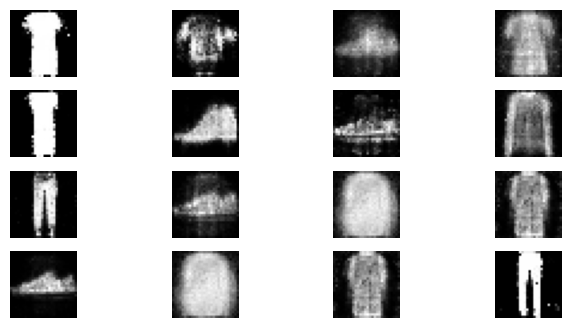

 64%|██████▍   | 32/50 [02:04<01:10,  3.94s/it]

Time for epoch 32 is 4.3411030769348145 sec
Training started with epoch 33 with 469 batches...
Losses after epoch    33: generator 2.422, discriminator 0.686, real_score 76.44%, fake_score 18.86%


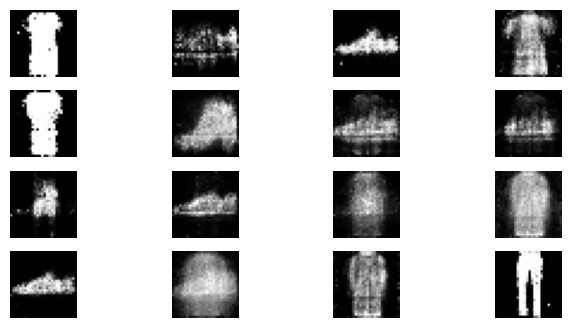

 66%|██████▌   | 33/50 [02:07<01:04,  3.80s/it]

Time for epoch 33 is 3.4677305221557617 sec
Training started with epoch 34 with 469 batches...
Losses after epoch    34: generator 2.790, discriminator 0.512, real_score 85.32%, fake_score 16.10%


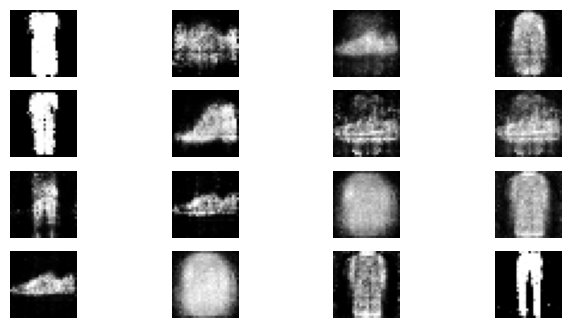

 68%|██████▊   | 34/50 [02:11<00:59,  3.71s/it]

Time for epoch 34 is 3.491250514984131 sec
Training started with epoch 35 with 469 batches...
Losses after epoch    35: generator 2.189, discriminator 0.666, real_score 79.11%, fake_score 21.49%


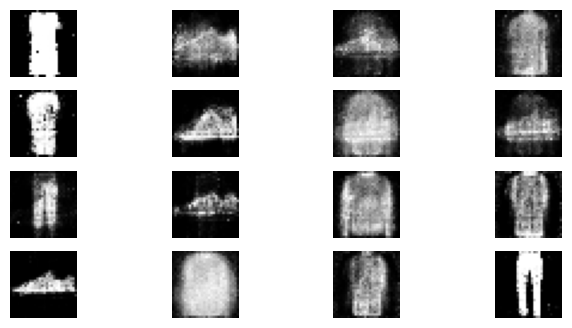

 70%|███████   | 35/50 [02:15<00:58,  3.92s/it]

Time for epoch 35 is 4.399853944778442 sec
Training started with epoch 36 with 469 batches...
Losses after epoch    36: generator 2.424, discriminator 0.911, real_score 75.63%, fake_score 20.48%


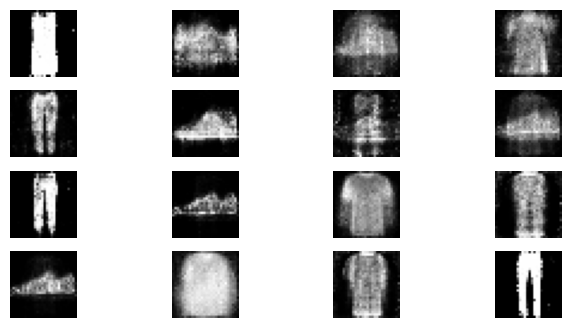

 72%|███████▏  | 36/50 [02:19<00:54,  3.89s/it]

Time for epoch 36 is 3.8160738945007324 sec
Training started with epoch 37 with 469 batches...
Losses after epoch    37: generator 2.040, discriminator 0.645, real_score 80.00%, fake_score 23.03%


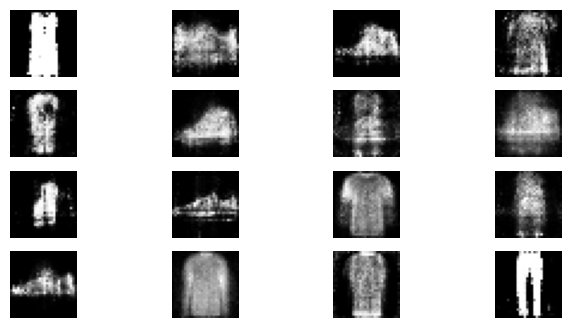

 74%|███████▍  | 37/50 [02:22<00:49,  3.77s/it]

Time for epoch 37 is 3.4901392459869385 sec
Training started with epoch 38 with 469 batches...
Losses after epoch    38: generator 1.921, discriminator 0.700, real_score 72.86%, fake_score 19.24%


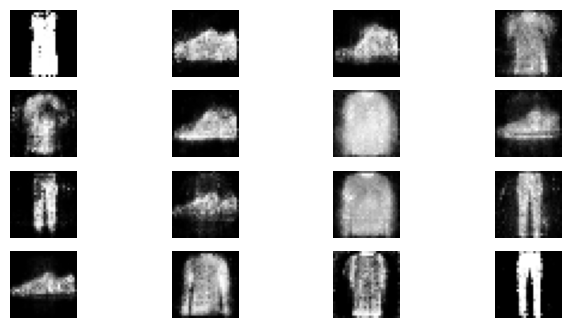

 76%|███████▌  | 38/50 [02:26<00:46,  3.84s/it]

Time for epoch 38 is 3.9935948848724365 sec
Training started with epoch 39 with 469 batches...
Losses after epoch    39: generator 1.629, discriminator 1.236, real_score 65.31%, fake_score 29.44%


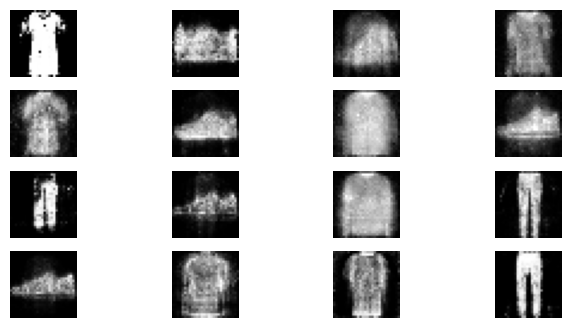

 78%|███████▊  | 39/50 [02:30<00:42,  3.87s/it]

Time for epoch 39 is 3.933349370956421 sec
Training started with epoch 40 with 469 batches...
Losses after epoch    40: generator 2.577, discriminator 0.659, real_score 80.02%, fake_score 18.13%


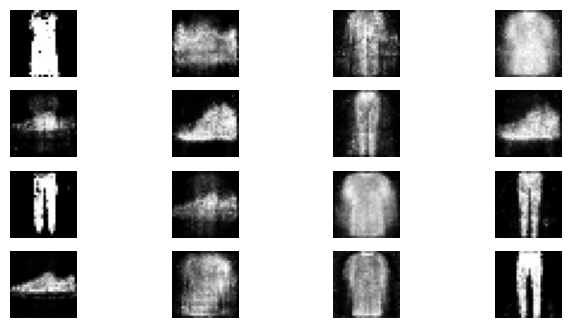

 80%|████████  | 40/50 [02:34<00:38,  3.87s/it]

Time for epoch 40 is 3.863983631134033 sec
Training started with epoch 41 with 469 batches...
Losses after epoch    41: generator 1.945, discriminator 1.287, real_score 63.28%, fake_score 26.84%


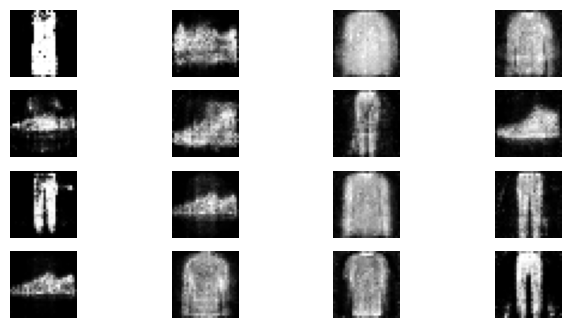

 82%|████████▏ | 41/50 [02:38<00:33,  3.76s/it]

Time for epoch 41 is 3.5028274059295654 sec
Training started with epoch 42 with 469 batches...
Losses after epoch    42: generator 1.918, discriminator 0.889, real_score 73.19%, fake_score 27.79%


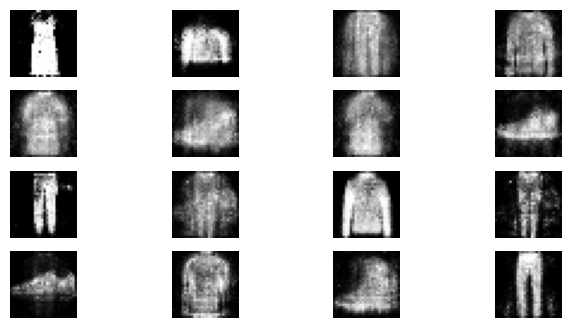

 84%|████████▍ | 42/50 [02:42<00:31,  3.97s/it]

Time for epoch 42 is 4.469272613525391 sec
Training started with epoch 43 with 469 batches...
Losses after epoch    43: generator 1.748, discriminator 0.694, real_score 83.34%, fake_score 28.81%


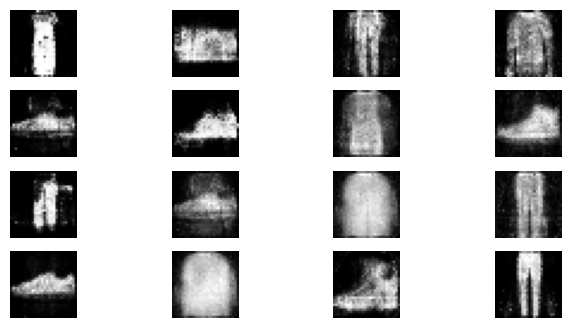

 86%|████████▌ | 43/50 [02:46<00:26,  3.83s/it]

Time for epoch 43 is 3.505246877670288 sec
Training started with epoch 44 with 469 batches...
Losses after epoch    44: generator 1.608, discriminator 0.789, real_score 72.47%, fake_score 26.64%


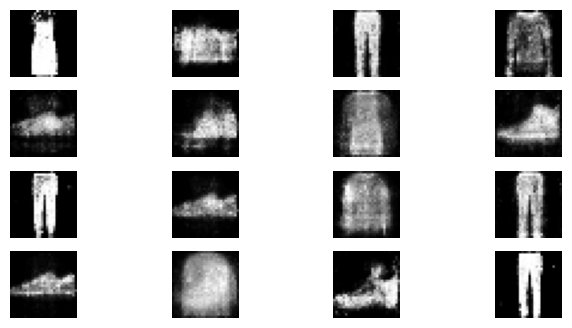

 88%|████████▊ | 44/50 [02:49<00:22,  3.74s/it]

Time for epoch 44 is 3.5153677463531494 sec
Training started with epoch 45 with 469 batches...
Losses after epoch    45: generator 2.102, discriminator 0.813, real_score 74.20%, fake_score 20.35%


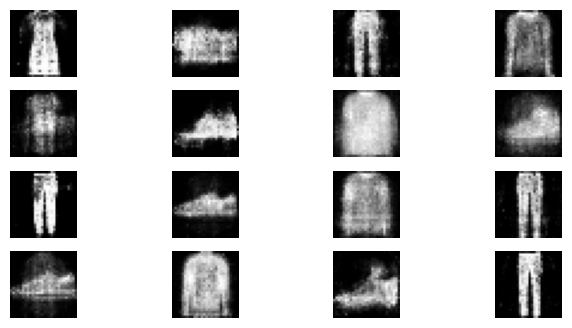

 90%|█████████ | 45/50 [02:54<00:20,  4.03s/it]

Time for epoch 45 is 4.718791484832764 sec
Training started with epoch 46 with 469 batches...
Losses after epoch    46: generator 2.757, discriminator 0.559, real_score 83.94%, fake_score 17.72%


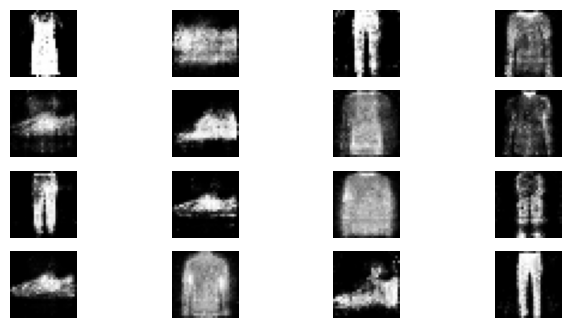

 92%|█████████▏| 46/50 [02:57<00:15,  3.87s/it]

Time for epoch 46 is 3.481886386871338 sec
Training started with epoch 47 with 469 batches...
Losses after epoch    47: generator 2.419, discriminator 0.863, real_score 75.77%, fake_score 20.58%


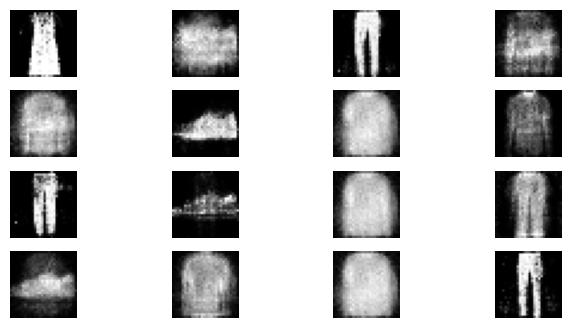

 94%|█████████▍| 47/50 [03:01<00:11,  3.76s/it]

Time for epoch 47 is 3.490037679672241 sec
Training started with epoch 48 with 469 batches...
Losses after epoch    48: generator 2.284, discriminator 0.640, real_score 79.55%, fake_score 18.98%


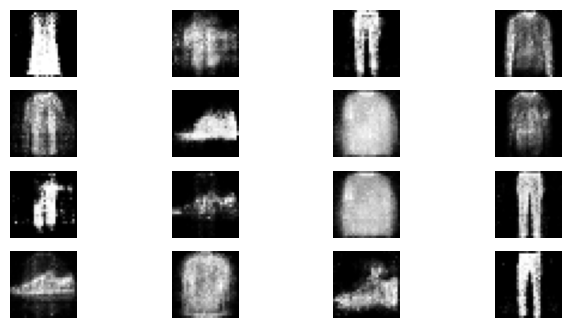

 96%|█████████▌| 48/50 [03:05<00:07,  3.80s/it]

Time for epoch 48 is 3.902799606323242 sec
Training started with epoch 49 with 469 batches...
Losses after epoch    49: generator 2.283, discriminator 0.755, real_score 74.00%, fake_score 22.67%


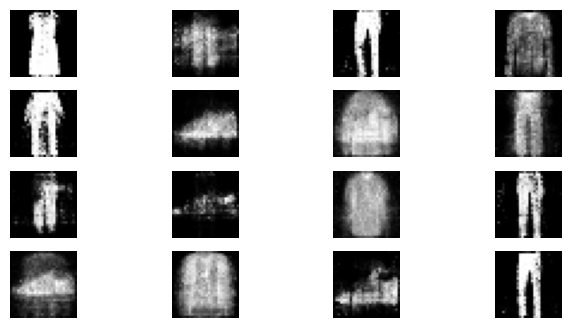

 98%|█████████▊| 49/50 [03:09<00:03,  3.87s/it]

Time for epoch 49 is 4.018008470535278 sec
Training started with epoch 50 with 469 batches...
Losses after epoch    50: generator 1.835, discriminator 0.705, real_score 76.12%, fake_score 24.86%


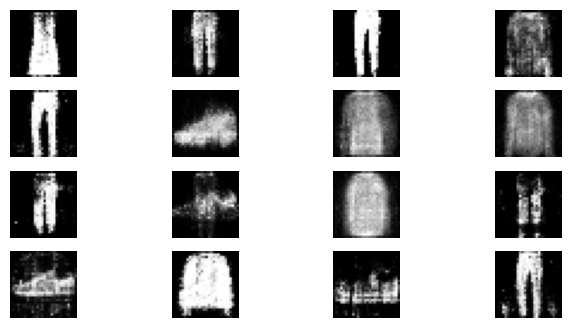

100%|██████████| 50/50 [03:13<00:00,  3.86s/it]

Time for epoch 50 is 3.9534568786621094 sec


In [31]:
gen_loss_epochs, disc_loss_epochs, real_score_list, fake_score_list = train(train_dataset, epochs = epochs)

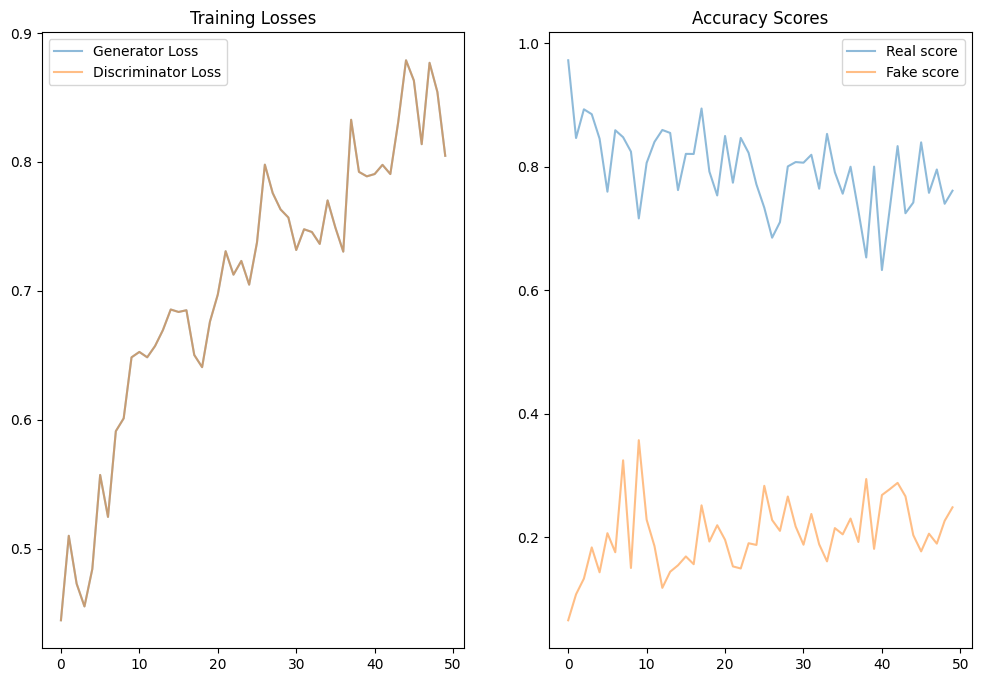

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,8))

ax1.plot(gen_loss_epochs, label='Generator Loss', alpha=0.5)
ax1.plot(disc_loss_epochs, label='Discriminator Loss', alpha=0.5)
ax1.legend()

ax1.set_title('Training Losses')
ax2.plot(real_score_list, label='Real score', alpha=0.5)
ax2.plot(fake_score_list, label='Fake score', alpha=0.5)
ax2.set_title('Accuracy Scores')
ax2.legend()

In [34]:
gen_loss_epochs

[<tf.Tensor: shape=(), dtype=float32, numpy=0.44448644>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5100219>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.47288534>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.45522726>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.48422083>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5571823>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5246627>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5911549>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.60108835>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.648411>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.65260506>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6484463>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6571806>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6695105>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.68551433>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.68360746>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.68494934>,
 <tf.Tensor: shape=(), dtype=float32, nu